<a href="https://colab.research.google.com/github/Leehaon/Data-Analysis/blob/main/20250316.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 한국복지패널 데이터

- 한국보건사회연구원 발견 조사자료
- 전국 7000여 가구 선정, 2006년도부터 매년 추적 조사한 자료
- 경제활동, 생활상태, 복지욕구 등 천여 개 변수로 구성이 됨
- 다양한 분야의 연구자, 정책전문가들이 활용
- 엄밀한 절차로 수집이 되고 다양한 변수가 있으므로 데이터 분석 연습에 많이 쓰이는 예제

In [155]:
# 패키지 설치 및 로드

# sav : 통계 분석 소프트웨어 spss 전용 파일
# pyreadstat 패키지를 설치하면 pandas 패키지를 이용해 불러 올 수 있다.

!pip install pyreadstat

In [156]:
# 패키지 로드
import pandas as pd
import numpy as np
import seaborn as sns

In [157]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 - 분석 전에 항상 원본 데이터에 복사본을 만들어서 복사본을 활용한다.
# 복사본을 활용하면 원본 데이터의 손실을 막을 수 있다.
welfare = raw_welfare.copy()

# 데이터 검토

In [158]:
welfare


,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [159]:
welfare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


# 1. 규모가 큰 데이터는 활용한 변수명을 쉬운 단어로 바꾸고 분석할 변수를 하나씩 살펴봐야 한다.

In [160]:
# 변수명 수정 - rename({'기존변수명' : '새로운변수명'})
welfare = welfare.rename(columns = {'h14_g3' : 's', # 성별
                                    'h14_g4' : 'birth', # 태어난 연도
                                    'h14_g10' : 'marriage_type', # 혼인 상태
                                    'h14_g11' : 'religion', # 종교
                                    'p1402_8aq1' : 'income', # 월급
                                    'h14_eco9' : 'code_job', # 직업 코드
                                    'h14_reg7' : 'code_region'}) # 지역 코드

# 2. 데이터 분석 절차

**1단계**
- 분석에 활용할 변수 전처리
  - 변수의 특징을 파악, 이상치와 결측치 정제
  - 변수의 값을 다루기 편하게 바꾸기
- 분석에 활용할 변수 각각 전처리
  -> 성별에 따른 종교 유무 : 성별, 종교 변수 각각 전처리

**2단계**
- 변수 간 관계 분석
  - 데이터 요약 : 표, 그래프 만들기
  - 분석 결과 해석

# 예제 : 성별에 따른 월급 차이 - 남녀가 월급에 차이가 있었을까?

In [161]:
### 성별 변수 검토 및 전처리
welfare['s'].dtypes

dtype('float64')

float64 : 실수형 (정수와 소수 다 포함)

int64 : 정수형

object : 문자형

datetiome64 : 날짜 시간 형태

In [162]:
welfare['s'].value_counts() # 빈도표

,count
s,
2.0,7913
1.0,6505


In [163]:
# 전처리
# 이상치 확인은 빈도표로 한다. 위의 빈도표에서 이상치가 보이지 않는다. -> 생략

In [164]:
# 성별 항목에 이름 부여
welfare['s'] = np.where(welfare['s'] == 1, 'male', 'female')

# 빈도
welfare['s'].value_counts()

,count
s,
female,7913
male,6505


<Axes: xlabel='s', ylabel='count'>

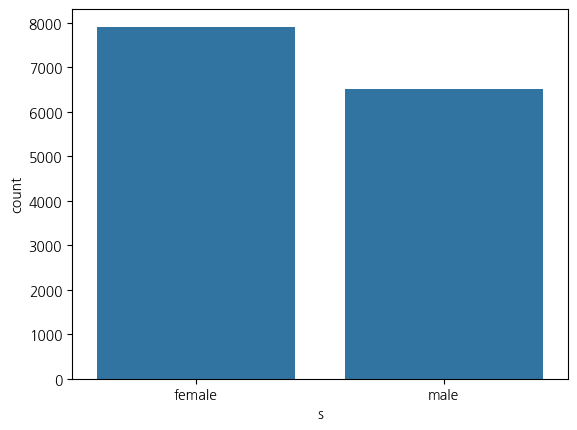

In [165]:
# 빈도 막대그래프
sns.countplot(data=welfare, x='s') # 빈도 그래프는 빈도가 막대의 길이가 되므로 y축을 지정할 필요가 없다.

In [166]:
### 월급 변수 검토 및 전처리
welfare['income'].dtypes
welfare['income'].describe() # 요약통계량

,income
count,4534.000000
mean,268.455007
std,198.021206
min,0.000000
25%,150.000000
50%,220.000000
75%,345.750000
max,1892.000000


<Axes: xlabel='income', ylabel='Count'>

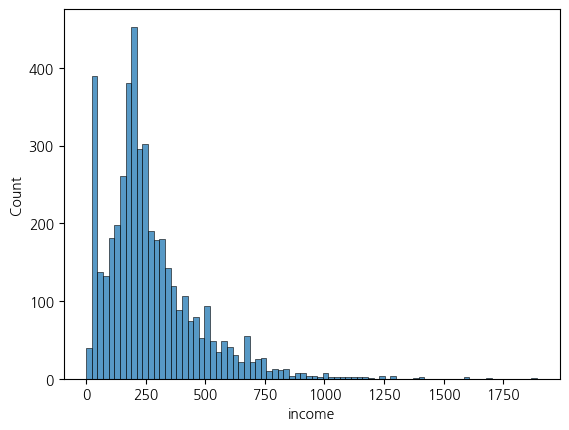

In [167]:
sns.histplot(data=welfare, x='income')

In [168]:
# 이상치 확인
welfare['income'].describe()

,income
count,4534.000000
mean,268.455007
std,198.021206
min,0.000000
25%,150.000000
50%,220.000000
75%,345.750000
max,1892.000000


In [169]:
# 결측치 확인
welfare['income'].isna().sum()

9884

In [170]:
### 성별에 따른 월급 차이

# 1. 성별 월급 평균표 생성
s_income = welfare.dropna(subset='income') \
.groupby('s', as_index=False) \
.agg(mean_income = ('income', 'mean'))

s_income

,s,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='s', ylabel='mean_income'>

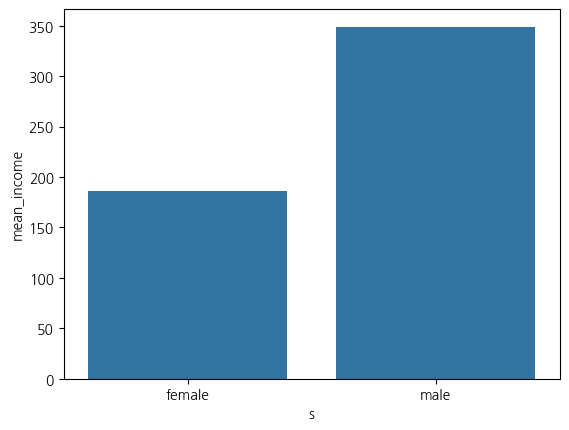

In [171]:
# 2. 막대그래프 생성
sns.barplot(data=s_income, x='s', y='mean_income')

남성이 여성보다 두 배에 가까운 월급을 받는 경향이 있다.

# 나이와 월급의 관계 - 몇 살 때 가장 월급을 많이 받는가?

In [172]:
### 나이 변수 검토 및 전처리

# 1. 변수 검토
welfare['birth'].dtypes
welfare['birth'].describe()

,birth
count,14418.000000
mean,1969.280205
std,24.402250
min,1907.000000
25%,1948.000000
50%,1968.000000
75%,1990.000000
max,2018.000000


<Axes: xlabel='birth', ylabel='Count'>

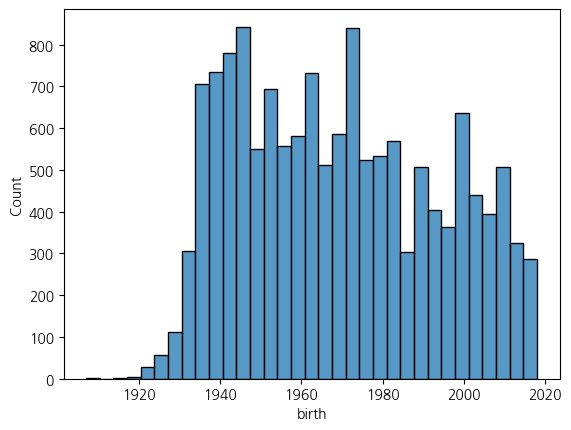

In [173]:
sns.histplot(data=welfare, x='birth')

In [174]:
# 2. 전처리
welfare['birth'].describe() # 이상치 확인

welfare['birth'].isna().sum() # 결측치 확인

0

In [175]:
# 3. 파생변수 나이 생성
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

,age
count,14418.000000
mean,50.719795
std,24.402250
min,2.000000
25%,30.000000
50%,52.000000
75%,72.000000
max,113.000000


In [176]:
### 나이와 월급의 관계 분석

# 1. 나이별 월급 평균표
age_income = welfare.dropna(subset='income') \
.groupby('age') \
.agg(mean_income = ('income', 'mean'))

age_income.head(20)

,mean_income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
24.0,143.742857
25.0,190.433333
26.0,190.430233
27.0,223.826667


<Axes: xlabel='age', ylabel='mean_income'>

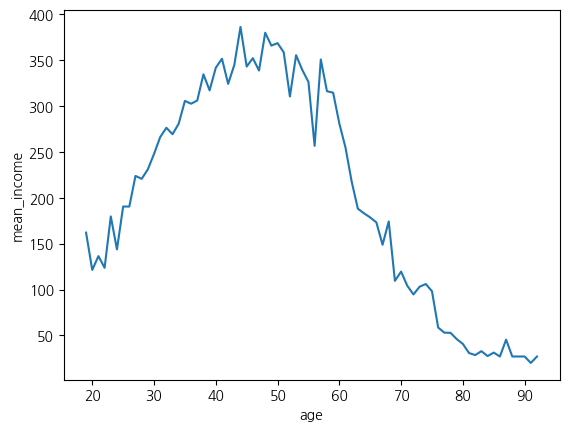

In [177]:
# 2. 그래프 생성 - 선 그래프
sns.lineplot(data=age_income, x='age', y='mean_income')

우리나라 사람들은 대부분 50대에 가장 많은 월급을 받게 되고, 20대부터 점점 월급이 오르다가 노년층에 접어드면서 월급이 급격하게 줄어드는 경향을 보인다.

# 연령대에 따른 월급 차이 - 어떤 연령대가 월급이 가장 많을까?

**기준**

초년생 - 30살 미만

중년층 - 30 ~ 59 살

노년층 - 60살 이상

In [178]:
### 파생변수 만들기 - 연령대 -> 만들고 바로 전처리
welfare['age'].head()

,age
0,75.0
1,72.0
2,78.0
3,58.0
4,57.0


In [179]:
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                         np.where(welfare['age'] <= 59, 'middle', 'old')))
# 빈도 확인
welfare['ageg'].value_counts()

,count
ageg,
old,5955
middle,4963
young,3500


<Axes: xlabel='ageg', ylabel='count'>

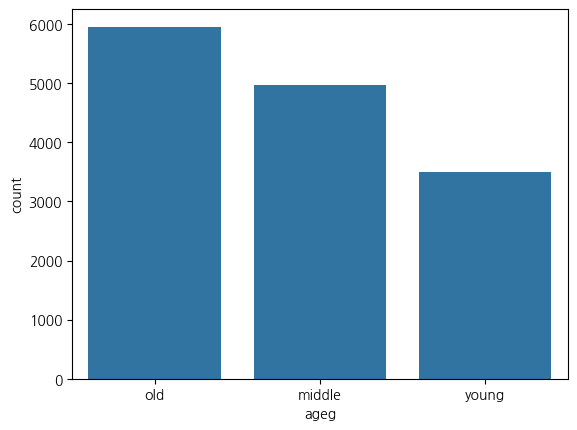

In [180]:
# 빈도 막대 그래프 생성
sns.countplot(data=welfare, x='ageg')

In [181]:
### 연령대에 따른 월급 차이 분석

# 1. 연령대별 월급 평균표 생성
ageg_income = welfare.dropna(subset='income') \
.groupby('ageg', as_index=False) \
.agg(mean_income = ('income', 'mean'))

ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<Axes: xlabel='ageg', ylabel='mean_income'>

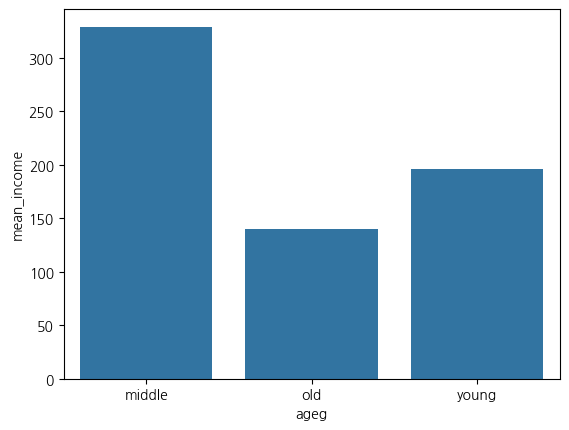

In [182]:
# 2. 막대 그래프 생성
sns.barplot(data=ageg_income, x='ageg', y='mean_income')

<Axes: xlabel='ageg', ylabel='mean_income'>

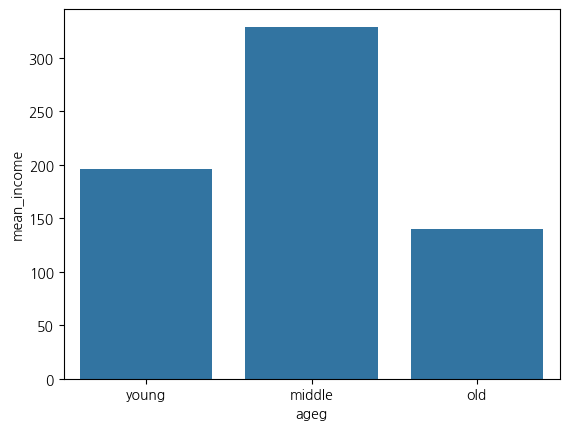

In [183]:
# 막대 정렬
sns.barplot(data=ageg_income, x='ageg', y='mean_income',
            order = ['young', 'middle', 'old'])

# 연령대 및 성별 월급 차이 - 성별 월급 차이 연령대별로 다를까?

In [184]:
# 연령대 및 성별 평균표 생성
s_income = welfare.dropna(subset='income') \
.groupby(['ageg', 's'], as_index=False) \
.agg(mean_income = ('income', 'mean'))

s_income

,ageg,s,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

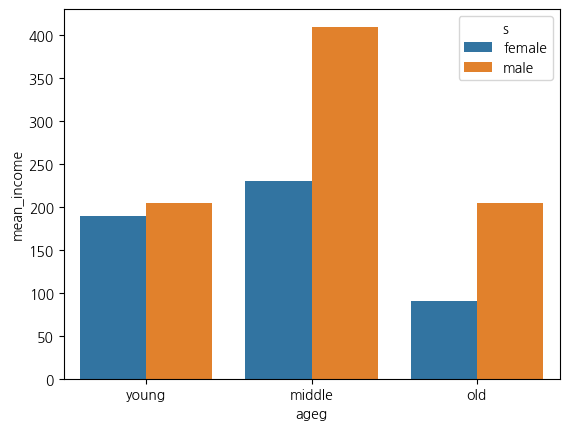

In [185]:
# 막대그래프 생성
sns.barplot(data=s_income, x='ageg', y='mean_income', hue='s',
            order = ['young', 'middle', 'old'])

In [186]:
### 나이 및 성별 월급 차이 - 선그래프
s_income = welfare.dropna(subset='income') \
.groupby(['age', 's'], as_index=False) \
.agg(mean_income = ('income', 'mean'))

s_income.head(10)

,age,s,mean_income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
5,22.0,female,124.388889
6,22.0,male,121.500000
7,23.0,female,178.655172
8,23.0,male,185.600000
9,24.0,female,144.370370


<Axes: xlabel='age', ylabel='mean_income'>

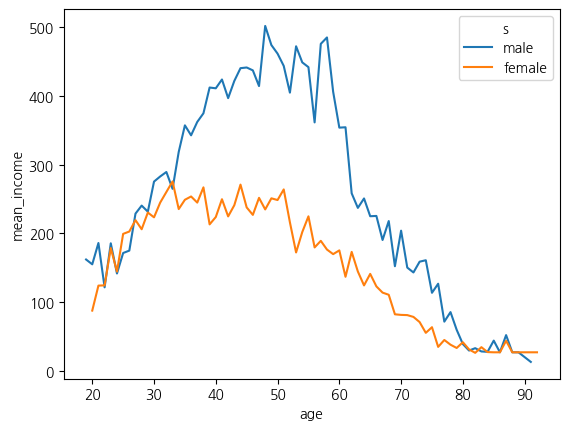

In [187]:
sns.lineplot(data=s_income, x='age', y='mean_income', hue='s')

# 직업별 월급 차이 - 어떤 직업이 돈을 가장 많이 벌까?

In [188]:
# 직업 변수 검토 및 전처리
welfare['code_job'].dtypes

dtype('float64')

In [189]:
welfare['code_job'].value_counts()

,count
code_job,
611.0,962
941.0,391
521.0,354
312.0,275
873.0,236
...,...
122.0,2
112.0,2
861.0,1


In [190]:
# 전처리
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [191]:
# welfare에 list_job을 결합 - 매칭
welfare = welfare.merge(list_job, how='left', on='code_job')

# code_job 결측치 제거하고 code_job, job 츨력
welfare.dropna(subset=['code_job'])[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [192]:
### 직업별 월급 차이 분석

# 1. 직업별 월급 평균표
job_income = welfare.dropna(subset=['job', 'income']) \
.groupby('job', as_index=False) \
.agg(mean_income = ('income', 'mean'))

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [193]:
# 2. 월급이 많은 직업 시각화
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [194]:
!pip install Koreanize-matplotlib

In [195]:
import koreanize_matplotlib

<Axes: xlabel='mean_income', ylabel='job'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


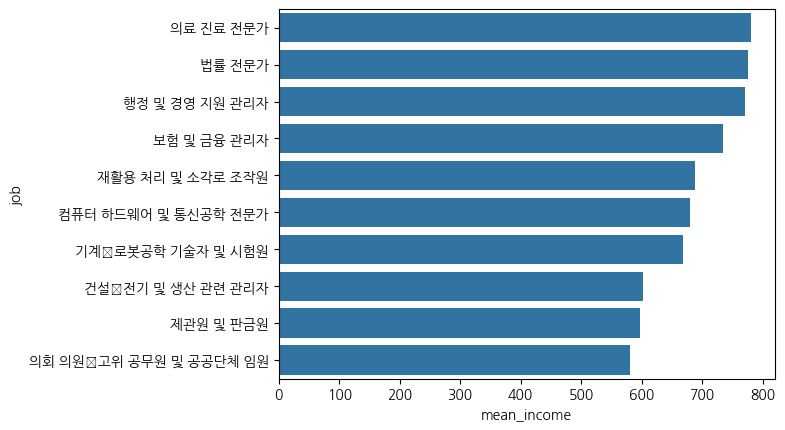

In [196]:
sns.barplot(data=top10, y='job', x='mean_income')

In [197]:
# 월급이 적은 직업 10개
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
126,채굴 및 토목 관련 기능 종사자,140.000000
139,학예사∙사서 및 기록물 관리사,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


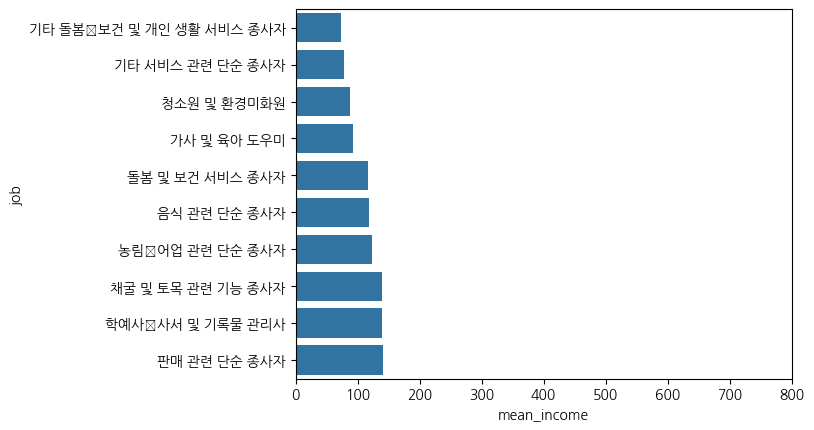

In [198]:
sns.barplot(data=bottom10, y='job', x='mean_income') \
.set(xlim=(0, 800))

# 지역별 연령대 비율 - 어느 지역에 노년층이 많을까?

In [199]:
### 지역 변수 검토 및 전처리
welfare['code_region'].dtypes

dtype('float64')

In [200]:
# 지역 코드 목록을 만들어준다.
list_region = pd.DataFrame({'code_region' : [1, 2, 3, 4, 5, 6, 7],
                            'region' : ['서울',
                                        '수도권(인천/경기)',
                                        '부산/경남/울산',
                                        '대구/경북',
                                        '대전/충남',
                                        '강원/충북',
                                        '광주/전남/전북/제주도']})
list_region

,code_region,region
0,1,서울
1,2,수도권(인천/경기)
2,3,부산/경남/울산
3,4,대구/경북
4,5,대전/충남
5,6,강원/충북
6,7,광주/전남/전북/제주도


In [201]:
# welfare에 지역명 변수 추가
welfare = welfare.merge(list_region, how='left', on='code_region')
welfare[['code_region', 'region']].head(20)

,code_region,region
0,1.0,서울
1,1.0,서울
2,1.0,서울
3,1.0,서울
4,1.0,서울
5,1.0,서울
6,1.0,서울
7,1.0,서울
8,2.0,수도권(인천/경기)
9,1.0,서울


In [205]:
### 지역별 연령대 비율 분석

# 1. 지역별 연령대 비율표 생성
region_ageg = welfare.groupby('region', as_index=False) \
['ageg'] \
.value_counts(normalize = True) # 비율 구하기

region_ageg

,region,ageg,proportion
0,강원/충북,old,0.459103
1,강원/충북,middle,0.308707
2,강원/충북,young,0.232190
3,광주/전남/전북/제주도,old,0.449311
4,광주/전남/전북/제주도,middle,0.317924
5,광주/전남/전북/제주도,young,0.232766
6,대구/경북,old,0.504051
7,대구/경북,middle,0.296296
8,대구/경북,young,0.199653
9,대전/충남,old,0.413372


In [206]:
# 그래프 생성
region_ageg = region_ageg.assign(proportion = region_ageg['proportion'] * 100) \
.round(1) # 반올림

<Axes: xlabel='proportion', ylabel='region'>

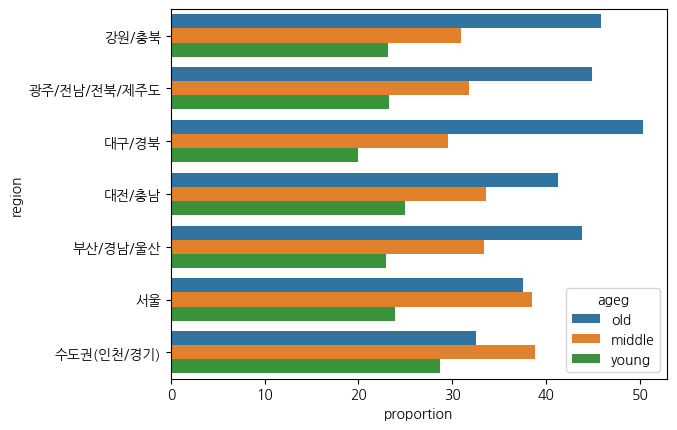

In [208]:
# 막대그래프 적용
sns.barplot(data=region_ageg, y='region', x='proportion', hue='ageg')

In [209]:
# 누적 비율 막대 그래프

# 피벗 : 사용자가 데이터의 행과 열을 상황에 맞게 재구성
pivot_df = \
region_ageg[['region', 'ageg', 'proportion']].pivot(index='region',
                                                    columns = 'ageg',
                                                    values = 'proportion')
pivot_df

ageg,middle,old,young
region,,,
강원/충북,30.9,45.9,23.2
광주/전남/전북/제주도,31.8,44.9,23.3
대구/경북,29.6,50.4,20.0
대전/충남,33.6,41.3,25.0
부산/경남/울산,33.4,43.8,22.9
서울,38.5,37.6,23.9
수도권(인천/경기),38.8,32.5,28.7


<Axes: ylabel='region'>

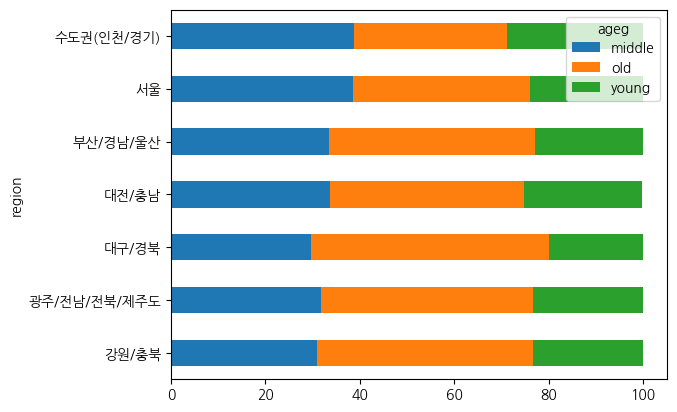

In [210]:
# 가로 막대그래프
pivot_df.plot.barh(stacked=True)

In [211]:
# 막대 정렬 - 노년층 비율 기준 정렬, 변수 순서 바꾸기
reorder_df = pivot_df.sort_values('old')[['young', 'middle', 'old']]
reorder_df

ageg,young,middle,old
region,,,
수도권(인천/경기),28.7,38.8,32.5
서울,23.9,38.5,37.6
대전/충남,25.0,33.6,41.3
부산/경남/울산,22.9,33.4,43.8
광주/전남/전북/제주도,23.3,31.8,44.9
강원/충북,23.2,30.9,45.9
대구/경북,20.0,29.6,50.4


<Axes: ylabel='region'>

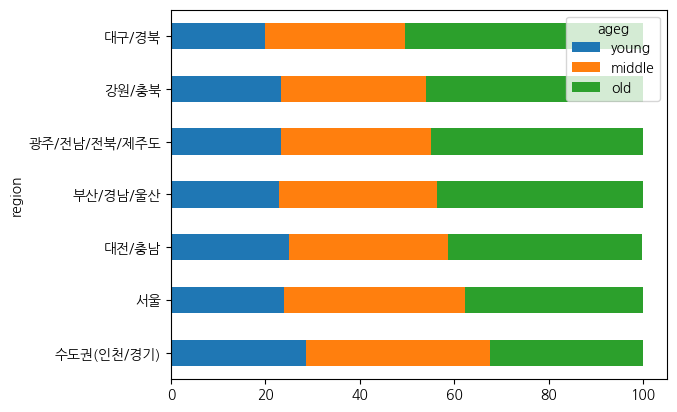

In [212]:
reorder_df.plot.barh(stacked=True)

# 타이타닉 데이터 - 생존자 예측 모델

타이타닉 데이터셋은 1912년도 타이타닉호 침몰 사고 당시 승객들의 정보와 생존 여부를 기록한 데이터

(기계 학습과 데이터 분석의 입문용으로 자주 사용된다.)

크게 데이터셋은
- train.csv (모델 학습용)
- test.csv (학습된 모델의 성능 평가용)

- gender_submission.csv

# 변수 설명
- Passangerid : 승객 고유 번호
- Survived : 생존 여부 (0:사망, 1:생존) - train에만 존재
- Pclass : 객실등급(1:1등급...)
- Name : 이름
- Sex : 성별
- Age : 나이
- Sibap : 함꼐 탑승한 형제자매 또는 배우자 수
- Parch : 함께 탑승한 부모 또는 자녀 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실 번호
- Embarked : 탑승 항구 (C:Cherbourg, Q:Queenstown, S:Southhampton)

1. 데이터 로드 및 탐색
  - pandas 활용
  - 데이터 구조 파악
  - 시각화, 변수 관계 파악
  - 가설 : 어떤 변수가 생존과 관련이 있을지?

2. 데이터 전처리
  - 결측치 처리
  - 범주형 변수 인코딩 : 성별이나 탑승 항구 같은 변수를 수치형으로 변환(원-핫 인코딩)
  - 데이터 정규화 / 표준화 : 필요에 따라 수치형 변수의 스케일 조정
  - 피쳐 엔지니어링 : 기존 변수를 조합하거나 변형해서 새로운 변수 생성
3. 모델 학습
  - scikit-learn 라이브러리 활용
4. 모델 평가
  - 정확도(accuracy), 정밀도(precision), 재현율(recall), F1-score 등 다양한 평가 지표 활용
5. 예측
6. 결과 해석하고 리포트 작성



---


# EDA(탐색적 데이터 분석)

예측을 위한 단서 찾기

- 데이터를 이해하면서 숨겨진 패턴을 발견하고, 가설을 세우고, 분석 방향 설정

1. 통계 : 평균, 표준편차, 최솟값, ...
2. 시각화 : 데이터를 그래프로 표현


---



In [215]:
# 데이터 로드
import pandas as pd

df = pd.read_csv('train.csv')

In [216]:
# 미리보기

df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
632,633,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C
551,552,0,2,"Sharp, Mr. Percival James R",male,27.0,0,0,244358,26.0000,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
631,632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
712,713,1,1,"Taylor, Mr. Elmer Zebley",male,48.0,1,0,19996,52.0000,C126,S
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0000,NaN,S
101,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [218]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [219]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [221]:
# 결측치 확인
print('\n 결측치 개수 : ')
df.isnull().sum()


 결측치 개수 : 


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Pclass', ylabel='Survived'>

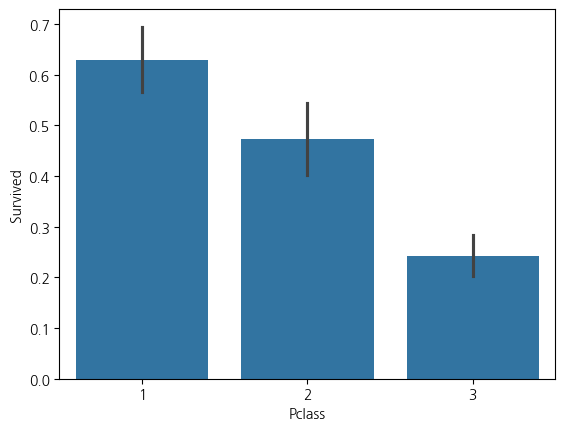

In [223]:
# 객실 등급에 따른 생존 차이 - 막대
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=df, x='Pclass', y='Survived')

# 분석 아이디어

- 객실 등급 : 객실 등급이 높을수록 생존율이 높았을 것으로 예상
- 성별 : 여성과 어린이의 생존율이 높았을 것으로 예상
- 나이 : 어린이와 노약자의 생존율 ?
- 동승자 : 가족과 함께 탑승을 한다면 생존율에 영향 ?
- 요금 : 높은 요금을 지불할수록 생존율이 높았을까?
- 탑승 항구 : 탑승했던 항구에 따라 생존율에 차이가 있을까?

# 시각화

1. 수치형 변수 시각화
 - 히스토그램 : 분포
 - 박스플롯 : 분포, 중앙값, 이상치
 - 산점도 : 관계

2. 범주형 변수 시각화
 - 막대그래프 : 빈도, 범주별 평균, 합계 ...
 - 파이 차트 : 비율

3. 변수간 관계 시각화
 - 산점도
 - 히트맵 : 상관관계

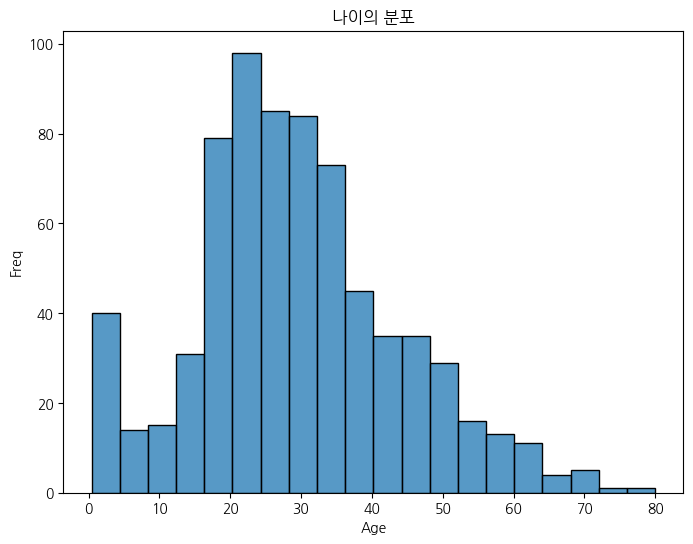

In [228]:
# 나이 (Age) 분포 시각화 - 히스토그램
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'].dropna(), bins=20, edgecolor='black')
plt.title('나이의 분포')
plt.xlabel('Age')
plt.ylabel('Freq')
plt.show()

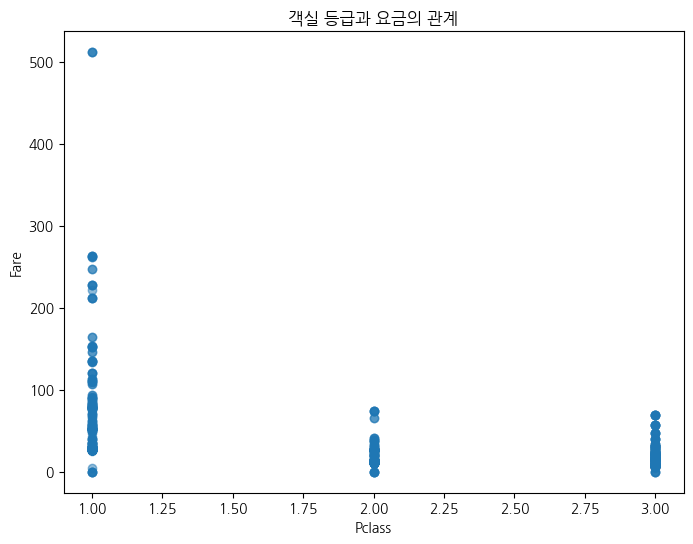

In [238]:
# 객실 등급(Pclass)과 요금(Face)의 관계 시각화
plt.figure(figsize=(8, 6))
plt.scatter(df['Pclass'], df['Fare'], alpha=0.5)
plt.title('객실 등급과 요금의 관계')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.show()

# 데이터 전처리 - 모델 학습 준비

- Garbage In, Garbage Out : 아무리 뛰어난 성능에 모델이라도 입력 데이터의 품질이 낮으면 좋은 성능을 기대하기 어렵다.
- 모델 성능 향상 : 전처리로 품질 향상 -> 모델이 데이터 패턴을 더 잘 학습하도록 도움
- 결측치, 이상치, 오류 : 처리를 해야 모델의 신뢰도를 높일 수 있다.
**머신러닝 모델들은 대부분 입력을 숫자형으로 받는다. 범주형 변수같은 경우는 숫자형으로 변환(인코딩)**
**데이터 스케일링 : 변수끼리 값의 범위가 크게 다르다면 모델 학습에 부적정인 영향을 미칠 수 있다. 그래서 변수의 범위를 조정해줄 필요가 있다.**

In [240]:
### 타이타닉 데이터 전처리 - train.csv

# 1. 데이터 로드 확인
train_df = pd.read_csv('train.csv')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [241]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [242]:
# 2. 결측치 처리
train_df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Age : 평균값으로 대체 (Pclass 나 Sex 별 평균나이를 구해서 대체)

Cabin : 결측치가 너무 많으므로 변수 자체를 제거하는 경우도 있다.

Embarked : 결측치가 적으므로, 최빈값으로 대체

In [247]:
# Age열 결측치 처리 : Pclass와 Sex별 평균 나이로 대체
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean))

df['Age'].isnull().sum()

0

In [252]:
# Cabin열 결측치 처리 : Unknown 대체
df['Cabin'].fillna('Unknown', inplace=True)

df['Cabin'].head(20)

<ipython-input-252-64d1a64d917d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cabin'].fillna('Unknown', inplace=True)


,Cabin
0,Unknown
1,C85
2,Unknown
3,C123
4,Unknown
5,Unknown
6,E46
7,Unknown
8,Unknown
9,Unknown


In [255]:
# Embarked열 격측치 처리 : 최빈값 대체
most = df['Embarked'].mode()[0]
df['Embarked'].fillna(most, inplace=True)

<ipython-input-255-22158910dbd0>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(most, inplace=True)


In [256]:
# 결측치 처리 결과 한번에 확인
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
